# Baseline Modeling For Titanic Life Prediction with Logistic Regression
Establish a simple, interpretable baseline model for Titanic survival prediction using logistic regression. This provides a benchmark performance metric and helps identify key predictive features before exploring more complex algorithms.<br>

**Approach**
- Use encoded categorical features and numerical variables
- Apply logistic regression for binary classification (survived/did not survive)
- Evaluate performance using accuracy, precision, recall, and F1-score
- Analyze feature coefficients to understand survival factors<br><br>

**Expected Outcomes**
- Baseline accuracy score for comparison with advanced models
- Identification of most influential survival predictors
- Foundation for iterative model improvement

### About Logistic Regression
A statistical machine learning algorithm used for binary classification problems. It predicts the probability of an event occurring (survival in this case) by fitting data to a logistic function.<br><br>

**Key Characteristics**
- Binary Output: Perfect for yes/no predictions (survived/not survived)
- Probability Estimates: Provides likelihood scores between 0 and 1
- Interpretable: Coefficients show feature importance and direction
- Linear Decision Boundary: Assumes linear relationship between features and log-odds<br><br>

**Why Use for Titanic?**
- Simple & Fast: Quick to implement and train
- No Feature Scaling Required: Works well with mixed feature scales
- Interpretable Results: Easy to explain which factors influence survival
- Robust Baseline: Provides reliable performance benchmark<br>
Logistic regression serves as an excellent starting point for understanding the Titanic dataset before advancing to more complex modeling techniques.

## Dataset
preprocessed seaborn built in dataset `titanic` is used for this modeling.

## Tasks
- Load and Prepare Dataset
    - Split Dataset into Features and Target
    - Split Dataset into Training and Testing Sets
- Train Model
- Apply Model to Make Prediction
- Evaluate Model Performance
- Summarize Model Evaluation

# Import Libraries

In [1]:
import pandas as pd, numpy as np
import warnings
warnings.filterwarnings("ignore")

# plot visualization
import matplotlib.pyplot as plt, seaborn as sns

# model and evaluation libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

# Load and prepare data for modeling

## Load data

In [2]:
# load clean data
df = pd.read_csv("data/titanic_clean.csv")

# load vertify
df.head()

,survived,pclass,fare,alone,sex_male,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton
0,0,3,7.2500,False,True,True,False,False,True
1,1,1,71.2833,False,False,False,True,False,False
2,1,3,7.9250,True,False,False,True,False,True
3,1,1,53.1000,False,False,False,True,False,True
4,0,3,8.0500,True,True,True,False,False,True


## Split the dataset into input features (x) and target variable (y)

In [3]:
# features
x = df.drop('survived', axis=1)

# target variable
y = df['survived']

In [4]:
# check data load
x

,pclass,fare,alone,sex_male,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton
0,3,7.2500,False,True,True,False,False,True
1,1,71.2833,False,False,False,True,False,False
2,3,7.9250,True,False,False,True,False,True
3,1,53.1000,False,False,False,True,False,True
4,3,8.0500,True,True,True,False,False,True
...,...,...,...,...,...,...,...,...
886,2,13.0000,True,True,True,False,False,True
887,1,30.0000,True,False,False,True,False,True
888,3,23.4500,False,False,False,True,False,True
889,1,30.0000,True,True,True,False,False,False


In [5]:
# target variable
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

## Split the dataset into training and testing sets

In [6]:
# split data into training and testing sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Logistic Regression Model Train and Make Prediction

## Train Logistic Regression Model

In [7]:
# create empty model
model = LogisticRegression()

In [8]:
# train model
model.fit(x_train, y_train)

LogisticRegression()

## Apply Model To Make Prediction

In [9]:
# make prediction on train data
y_train_pred = model.predict(x_train)

# make prediction on test data
y_test_pred = model.predict(x_test)

# Evaluation of The Model Performance

## Detailed Model Performance

In [10]:
# calculate model performance metrics for training and test set predictions
def model_performance(actual, pred):
    # classification report
    c_report = classification_report(actual, pred)
    
    # confusion matrix
    cnf_mat = confusion_matrix(actual, pred)
    
    # additional metrics
    acc = accuracy_score(actual, pred)
    
    return c_report, cnf_mat, acc

In [11]:
# model performance for training set
train_c_report, train_cnf, train_acc = model_performance(y_train, y_train_pred)

print("Classification Report for Training Set".center(50), end="\n\n")
print(train_c_report)
print()
print("Confusion Matrix for Training Set".center(50), end="\n\n")
print(train_cnf)
print("\nAccuracy:", round(train_acc, 5))

      Classification Report for Training Set      

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       392
           1       0.73      0.73      0.73       231

    accuracy                           0.80       623
   macro avg       0.79      0.79      0.79       623
weighted avg       0.80      0.80      0.80       623


        Confusion Matrix for Training Set         

[[331  61]
 [ 63 168]]

Accuracy: 0.80096


In [12]:
# model performance for test set
test_c_report, test_cnf, test_acc = model_performance(y_test, y_test_pred)

print("Classification Report for test Set".center(50), end="\n\n")
print(test_c_report)
print()
print("Confusion Matrix for test Set".center(50), end="\n\n")
print(test_cnf)
print("\nAccuracy:", round(test_acc, 5))

        Classification Report for test Set        

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.75      0.75      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268


          Confusion Matrix for test Set           

[[130  27]
 [ 28  83]]

Accuracy: 0.79478


## Summary of The Model Evaluation

In [13]:
# Calculate additional metrics for summary
def metrics_summary(actual, pred):
    # precision score
    precision = precision_score(actual, pred)

    # recall score
    recall = recall_score(actual, pred)

    # f1 score
    f1 = f1_score(actual, pred)

    return precision, recall, f1

In [14]:
# model performance for training set
train_precision, train_recall, train_f1 = metrics_summary(y_train, y_train_pred)

# model performance for test set
test_precision, test_recall, test_f1 = metrics_summary(y_test, y_test_pred)

In [15]:
lr_model = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Training': [train_precision, train_recall, train_f1, train_acc],
    'Test': [test_precision, test_recall, test_f1, test_acc]
}).round(5)

In [16]:
lr_model

,Metric,Training,Test
0,Precision,0.73362,0.75455
1,Recall,0.72727,0.74775
2,F1-Score,0.73043,0.75113
3,Accuracy,0.80096,0.79478


### Metrics Summary

In [17]:
accuracy_gap = abs(train_acc - test_acc)
model_status = 'Good' if test_acc > 0.85 else 'Fair' if test_acc > 0.75 else 'Needs Improvement'
generalization = 'Overfitting' if train_acc - test_acc > 0.05 else 'Best Fit'

print("=== METRICS SUMMARY ===")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Accuracy Gap: {accuracy_gap:.4f} ({generalization})")
print(f"Model Performance: {model_status}")

=== METRICS SUMMARY ===
Training Accuracy: 0.8010
Test Accuracy: 0.7948
Accuracy Gap: 0.0062 (Best Fit)
Model Performance: Fair


# Visualization of The Model Prediction

## ROC Curve Comparison

### Predicted Probabilities

In [18]:
# Get predicted probabilities for train set
train_proba = model.predict_proba(x_train)[:, 1]

train_proba

array([0.7883397 , 0.07449353, 0.4866549 , 0.13776876, 0.13759717,
       0.31251477, 0.7403022 , 0.07450378, 0.07452039, 0.29323132,
       0.9405921 , 0.16934405, 0.05859268, 0.07443736, 0.88849434,
       0.0739707 , 0.29323049, 0.36018939, 0.68336033, 0.05938359,
       0.58338785, 0.35387351, 0.0744772 , 0.10776288, 0.6591736 ,
       0.69446461, 0.07449547, 0.34787123, 0.10848299, 0.24748791,
       0.11278348, 0.59045063, 0.52936518, 0.46460057, 0.13880214,
       0.16900547, 0.07450378, 0.45654227, 0.07558054, 0.52791859,
       0.34235892, 0.16934405, 0.34746422, 0.73932847, 0.29299424,
       0.07449353, 0.07450378, 0.78418779, 0.52844687, 0.7846766 ,
       0.58590318, 0.48904832, 0.34419444, 0.07450378, 0.29268165,
       0.07448717, 0.78418779, 0.58984661, 0.07449077, 0.68333339,
       0.53268863, 0.10776288, 0.14043172, 0.52566461, 0.528759  ,
       0.16934405, 0.17111338, 0.34683092, 0.90734454, 0.73904982,
       0.140599  , 0.16941183, 0.05921159, 0.07450378, 0.35834

In [19]:
# get predicted probabilities for test set
test_proba = model.predict_proba(x_test)[:, 1]

test_proba

array([0.11285983, 0.16900547, 0.07449547, 0.70932419, 0.65819879,
       0.90725134, 0.68333339, 0.05909094, 0.68333339, 0.8778257 ,
       0.29212343, 0.07450378, 0.53055131, 0.14043172, 0.16934405,
       0.87917471, 0.29201469, 0.6833499 , 0.16934405, 0.34790128,
       0.07449353, 0.34235892, 0.52632241, 0.07458188, 0.07493345,
       0.3575761 , 0.51421987, 0.16934405, 0.3575761 , 0.58983011,
       0.07449353, 0.58980582, 0.5149359 , 0.58975919, 0.07450378,
       0.11278348, 0.3443032 , 0.68333339, 0.94993096, 0.07449353,
       0.14308937, 0.05850681, 0.07450378, 0.10776288, 0.69430274,
       0.05997432, 0.07451097, 0.07458188, 0.07443736, 0.47039837,
       0.65993445, 0.88460358, 0.05962355, 0.79440709, 0.10776288,
       0.88323429, 0.16900547, 0.94753611, 0.7858951 , 0.68336033,
       0.07448551, 0.70663488, 0.74025589, 0.34222335, 0.10776288,
       0.78418779, 0.17770297, 0.07449215, 0.11208875, 0.93881144,
       0.74025589, 0.94824308, 0.51476844, 0.93908164, 0.07449

### Curve Comparison

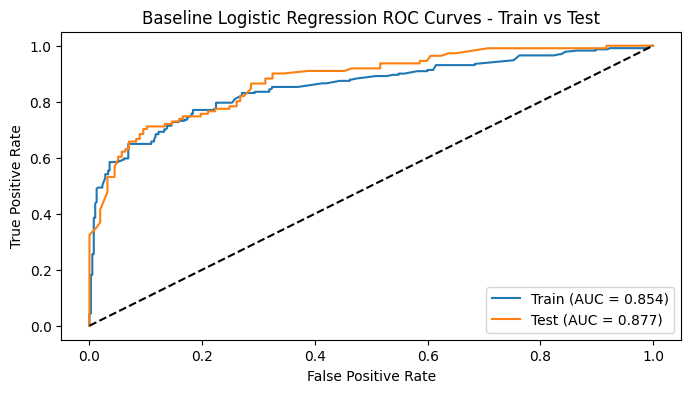

In [20]:
# figure size
plt.figure(figsize=(8, 4))

# ROC Curves
fpr_train, tpr_train, _ = roc_curve(y_train, train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, test_proba)

# ploting the curve
plt.plot(fpr_train, tpr_train, label=f'Train (AUC = {auc(fpr_train, tpr_train):.3f})')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {auc(fpr_test, tpr_test):.3f})')
plt.plot([0, 1], [0, 1], 'k--')

# set labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Baseline Logistic Regression ROC Curves - Train vs Test')
plt.legend()

plt.show()

In [21]:
auc_gap = abs(auc(fpr_train, tpr_train) - auc(fpr_test, tpr_test))

print("=== SUMMARY ===")
print(f"Training AUC: {auc(fpr_train, tpr_train):.3f}")
print(f"Test AUC: {auc(fpr_test, tpr_test):.3f}")
print(f"AUC Gap: {auc_gap:.4f}")

=== SUMMARY ===
Training AUC: 0.854
Test AUC: 0.877
AUC Gap: 0.0230


## Confusion Matrices Visualizaion

### Confusion Matrix Visualization for Train Set

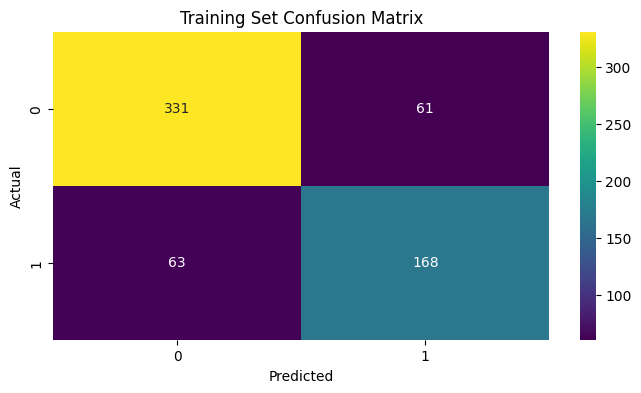

In [22]:
# figure size for train set
plt.figure(figsize=(8, 4))

# Training Confusion Matrix
sns.heatmap(train_cnf, annot=True, fmt='d', cmap='viridis')

# set labels 
plt.title('Training Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [23]:
print("Confusion Matrix for Training Set:")
print(train_cnf)

Confusion Matrix for Training Set:
[[331  61]
 [ 63 168]]


### Confusion Matrix Visualization for Test Set

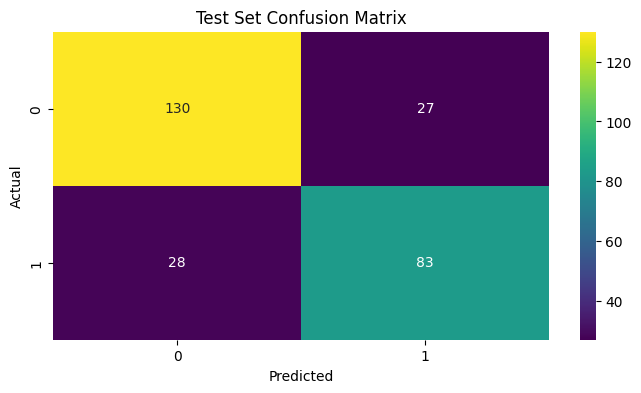

In [24]:
# figure size
plt.figure(figsize=(8, 4))

# Test Confusion Matrix
sns.heatmap(test_cnf, annot=True, fmt='d', cmap='viridis')

# set labels
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [25]:
print("Confusion Matrix for Test Set:")
print(test_cnf)

Confusion Matrix for Test Set:
[[130  27]
 [ 28  83]]


# Summary of The Model Performance

In [26]:
# dataframe of the model performance summary
performance_summary = pd.DataFrame({
    'Metric': [
        'Accuracy',
        'AUC Score',
        'Precision',
        'Recall',
        'F1-Score',
        'Generalization',
        'Model Status'
    ],
    'Training': [
        f"{train_acc:.4f}",
        f"{auc(fpr_train, tpr_train):.3f}",
        f"{train_precision:.4f}",
        f"{train_recall:.4f}",
        f"{train_f1:.4f}",
        '-',
        '-'
    ],
    'Test': [
        f"{test_acc:.4f}",
        f"{auc(fpr_test, tpr_test):.3f}",
        f"{test_precision:.4f}",
        f"{test_recall:.4f}",
        f"{test_f1:.4f}",
        '-',
        model_status
    ],
    'Gap/Generalization': [
        f"{accuracy_gap:.4f}",
        f"{auc_gap:.3f}",
        f"{abs(train_precision - test_precision):.4f}",
        f"{abs(train_recall - test_recall):.4f}",
        f"{abs(train_f1 - test_f1):.4f}",
        generalization,
        '-'
    ]
})

In [27]:
performance_summary

,Metric,Training,Test,Gap/Generalization
0,Accuracy,0.8010,0.7948,0.0062
1,AUC Score,0.854,0.877,0.023
2,Precision,0.7336,0.7545,0.0209
3,Recall,0.7273,0.7477,0.0205
4,F1-Score,0.7304,0.7511,0.0207
5,Generalization,-,-,Best Fit
6,Model Status,-,Fair,-


# Save Results

In [28]:
# to save the results
import joblib

In [29]:
# model performance summary
joblib.dump(performance_summary, 'model/BaselineModelSummary.csv')

['model/BaselineModelSummary.csv']

In [30]:
# save the model
joblib.dump(model, 'model/baselineModel.pkl')

['model/baselineModel.pkl']